<a href="https://colab.research.google.com/github/devbabbar7/Zomato_Bangalore_Restaurant_Rating_Prediction/blob/main/Zomato_Bangalore_Restaurant_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks"

In [6]:
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

 90% 80.0M/89.0M [00:02<00:00, 56.9MB/s]
100% 89.0M/89.0M [00:03<00:00, 25.0MB/s]


In [4]:
ls

'Bash Assignment.ipynb'
'Clothes classifier.ipynb'
 kaggle.json
 locations.csv
 temp-plot.html
'tensorflow first code.ipynb'
'Zomato Bangalore Restaurant Rating Prediction.ipynb'
 zomato.csv


In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [14]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/zomato-bangalore-restaurants.zip","r") as z:
  z.extractall(".")

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zomato.csv")

In [7]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [10]:
zomato=df.drop(['url','dish_liked','phone'],axis=1)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
zomato.rename({'approx_cost(for two people)': 'approx_cost_for_2_people',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost_for_2_people',
       'reviews_list', 'menu_item', 'listed_in_type', 'listed_in_city'],
      dtype='object')

In [12]:
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
zomato.votes = zomato.votes.astype('int')
zomato['approx_cost_for_2_people'] = zomato['approx_cost_for_2_people'].apply(remove_comma)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [13]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   address                   51717 non-null  object 
 1   name                      51717 non-null  object 
 2   online_order              51717 non-null  object 
 3   book_table                51717 non-null  object 
 4   rate                      43942 non-null  object 
 5   votes                     51717 non-null  int64  
 6   location                  51696 non-null  object 
 7   rest_type                 51490 non-null  object 
 8   cuisines                  51672 non-null  object 
 9   approx_cost_for_2_people  51371 non-null  float64
 10  reviews_list              51717 non-null  object 
 11  menu_item                 51717 non-null  object 
 12  listed_in_type            51717 non-null  object 
 13  listed_in_city            51717 non-null  object 
dtypes: flo

In [14]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
#converting 'rate' into float
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [16]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   address                   49440 non-null  object 
 1   name                      49440 non-null  object 
 2   online_order              49440 non-null  object 
 3   book_table                49440 non-null  object 
 4   rate                      41665 non-null  float64
 5   votes                     49440 non-null  int64  
 6   location                  49419 non-null  object 
 7   rest_type                 49215 non-null  object 
 8   cuisines                  49395 non-null  object 
 9   approx_cost_for_2_people  49099 non-null  float64
 10  reviews_list              49440 non-null  object 
 11  menu_item                 49440 non-null  object 
 12  listed_in_type            49440 non-null  object 
 13  listed_in_city            49440 non-null  object 
dtypes: flo

In [17]:
#Encode the input variable columns into 0,1,2...
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'approx_cost_for_2_people', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())
zomato_en['rate'] = zomato_en['rate'].fillna(zomato_en['rate'].mean())
zomato_en['approx_cost_for_2_people'] = zomato_en['approx_cost_for_2_people'].fillna(zomato_en['approx_cost_for_2_people'].mean())
zomato_en.isna().sum()

address                     0
name                        0
online_order                0
book_table                  0
rate                        0
votes                       0
location                    0
rest_type                   0
cuisines                    0
approx_cost_for_2_people    0
reviews_list                0
menu_item                   0
listed_in_type              0
listed_in_city              0
dtype: int64

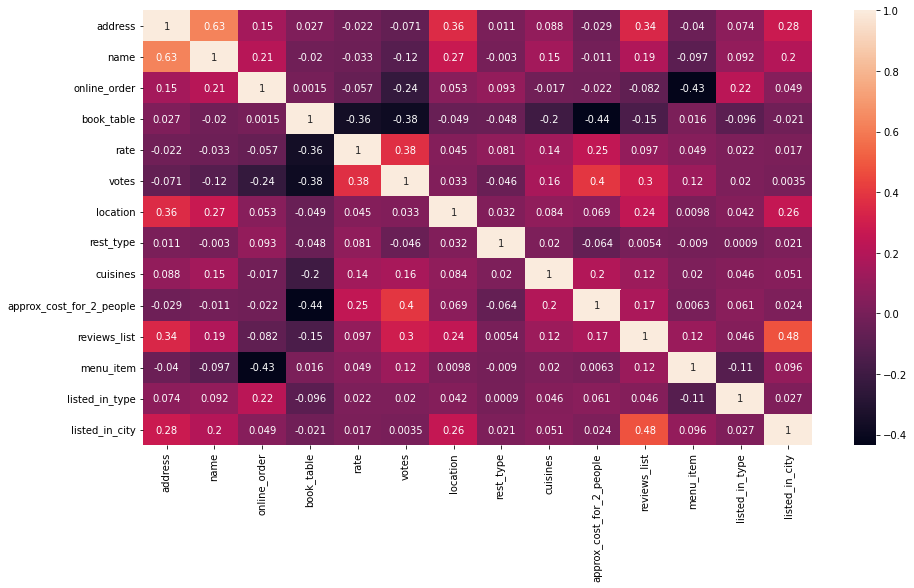

In [18]:
#Starting regression prediction
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [19]:
zomato_en.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost_for_2_people',
       'reviews_list', 'menu_item', 'listed_in_type', 'listed_in_city'],
      dtype='object')

In [20]:
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost_for_2_people,menu_item
2386,0,1,414,3,2,607,500.0,0
17957,1,1,210,77,0,5,700.0,0
6148,1,1,5,24,2,33,200.0,0
353,0,1,59,4,0,5,700.0,0
45525,0,1,123,41,4,298,600.0,863


In [21]:
y_train.head()

2386     4.1
17957    3.8
6148     3.4
353      3.6
45525    3.6
Name: rate, dtype: float64

In [22]:
#Applying linear regression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3021491658961619

In [23]:
#Applying decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

0.8394506717620929

In [24]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8402972029126435

In [49]:
%%time
kkkk = x_test.head(1)
print(kkkk)
print(x_train.columns)
print(RForest.predict(kkkk))

       online_order  book_table  votes  location  rest_type  cuisines  \
46092             0           1    114        36          0      1009   

       approx_cost_for_2_people  menu_item  
46092                    1000.0          0  
Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'approx_cost_for_2_people', 'menu_item'],
      dtype='object')
[4.00133333]
CPU times: user 6.83 ms, sys: 19 µs, total: 6.85 ms
Wall time: 6.36 ms
